In [6]:
import tensorflow as tf
from tensorflow.keras import layers, utils
from tensorflow.keras.datasets import mnist

# data loading
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 60000*(28*28) -> 60000*(784) (28*28 2차원 metrix를 784 1차원으로 바꿈)
X_train = X_train.reshape(60000, 784)
# float로 바꿈
X_train = X_train.astype('float32')
X_test = X_test.reshape(10000,784).astype('float')

# data를 0과 1사이값으로 normalize
X_train /= 255
X_test /= 255

# 자동 one hot coding 가능
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

In [8]:
import math

# 10번째 샘플의 실제 숫자 모양확인

for i in range(784):
    if i%28==0:
        print()
    print(math.ceil(X_train[10][i]),end=" ")
        
print()
print(y_train[10])


0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [9]:
# Sequential 시작
model = tf.keras.Sequential()

# 첫번째 input layer
# dropout : mini batch마다 랜덤하게 적용한다. 
# node의 개수 : 512개, input node : 784개
model.add(layers.Dense(512, input_shape=(784,)))
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.2))

# 두번째 hidden layer
model.add(layers.Dense(512))
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.2))

# 세번째 output layer
# classification에서 activation함수는 softmax를 주로쓴다.
# 아웃풋은 10개 (숫자 0~9)
model.add(layers.Dense(10))
model.add(layers.Activation('softmax'))

# compile model
model.compile(loss='categorical_crossentropy',
                optimizer='Adam',
                metrics=['accuracy'])

In [10]:
# train model
'''
batch_size       : 몇번의 학습마다 weight를 개선할것인지 판단
epochs           : train을 총 몇번 반복할 것인가 (과도하게 하면 overfitting 발생)
validation_split : train set 중 몇프로를 validation으로 정할것인가. (매 epochs마다 확인)
early_stop       : 조기 종료조건, val_loss가 10번까지 개선되지 않으면 종료.
shuffle          : 매 epoch마다 데이터 순서 섞음
verbose          : 학습의 과정을 보여줌. ( 0:표시x, 1:진척도표시, loss, accuracy변화표시, 2:매epoch마다)
'''
early_stop = tf.keras.callbacks.EarlyStopping(
                monitor='val_loss', patience=10)
hist = model.fit(X_train, y_train,
          batch_size=100,    epochs=50,
          validation_split=0.2, callbacks=[early_stop], 
          shuffle=True,      verbose=1)

# evaluate model
score = model.evaluate(X_test, y_test, verbose=1)
print('loss=', score[0])
print('accuracy=', score[1])

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 6s 120us/sample - loss: 0.2646 - accuracy: 0.9196 - val_loss: 0.1251 - val_accuracy: 0.9654
Epoch 2/50
48000/48000 [==============================] - 5s 98us/sample - loss: 0.1091 - accuracy: 0.9656 - val_loss: 0.0962 - val_accuracy: 0.9695
Epoch 3/50
48000/48000 [==============================] - 5s 97us/sample - loss: 0.0770 - accuracy: 0.9752 - val_loss: 0.0793 - val_accuracy: 0.9746
Epoch 4/50
48000/48000 [==============================] - 5s 100us/sample - loss: 0.0602 - accuracy: 0.9809 - val_loss: 0.0758 - val_accuracy: 0.9762
Epoch 5/50
48000/48000 [==============================] - 5s 99us/sample - loss: 0.0484 - accuracy: 0.9841 - val_loss: 0.0833 - val_accuracy: 0.9760
Epoch 6/50
48000/48000 [==============================] - 5s 97us/sample - loss: 0.0414 - accuracy: 0.9864 - val_loss: 0.0742 - val_accuracy: 0.9794
Epoch 7/50
48000/48000 [==============================

loss= 0.07693078524273256
accuracy= 0.9824


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
activation (Activation)      (None, 512)               0         
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5

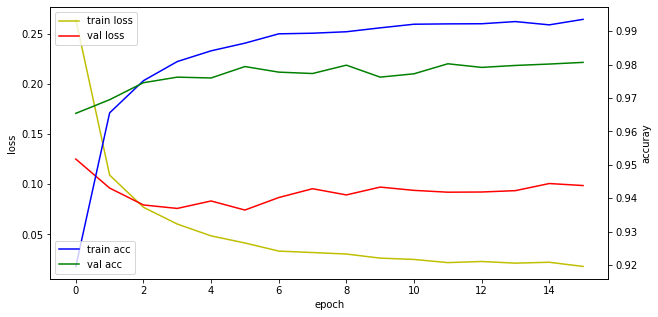

In [13]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize=(10, 5))
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')
loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()